In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
np.set_printoptions(precision = 15)

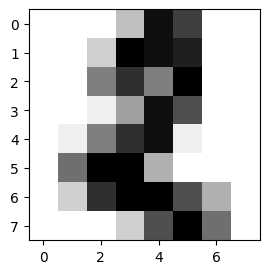

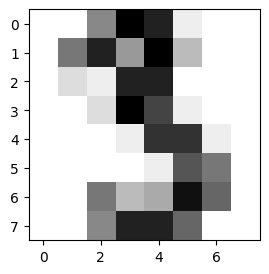

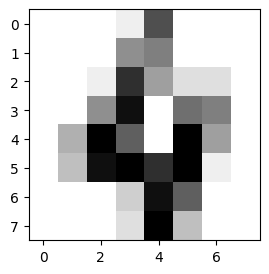

In [ ]:
digits = datasets.load_digits()
X = []
for i in range(2, 5):
  plt.figure(1, figsize=(3, 3))
  X.append(digits.data[i])
  plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation="nearest")
  plt.show()
X = np.array(X)/16
X = X.T

In [ ]:
N, D, K = len(X), len(X[0]), len(X[0])
p = np.random.rand(N, K)
Pi = np.full(K, 1.0/K)
for i in range(N):
  for j in range(D):
    if X[i][j] >= 0.5:
      X[i][j] = 1
    else:
      X[i][j] = 0
print(X.shape)

(64, 3)


In [ ]:
def bernoulli(X, p, N, D, K):
  B = np.ones((D, K), float)
  for j in range(D):
    for k in range(K):
      for i in range(N):
        B[j][k] *= (p[i][k]**X[i][j] * (1 - p[i][k])**(1 - X[i][j]))
  return B

In [ ]:
def E_step(Pi, X, p, N, D, K):
  B = bernoulli(X, p, N, D, K)
  Gamma = np.zeros((D, K), float)
  Gamma_sum = B @ Pi
  for j in range(D):
    for k in range(K):
      Gamma[j][k] = Pi[k]*B[j][k] / Gamma_sum[j]
  return Gamma

In [ ]:
def M_step(X, Gamma, N, D, K):
  _Pi = np.zeros(K, float)
  Gamma_sum = np.zeros(K, float)
  for k in range(K):
    _Pi[k] = np.mean(Gamma[:,k])
    Gamma_sum[k] = np.sum(Gamma[:,k])
  _p = np.zeros((N, K), float)
  for k in range(K):
    for j in range(D):
      _p[:,k] += Gamma[j][k]*X[:,j]
    _p[:,k] /= Gamma_sum[k]
  return _Pi, _p

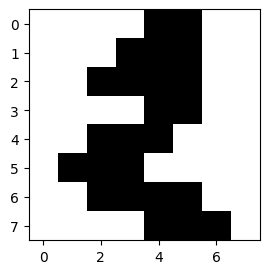

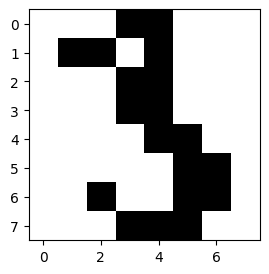

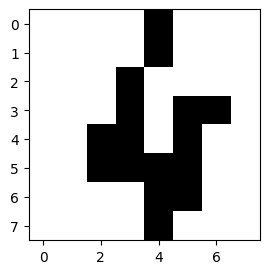

In [ ]:
for _ in range(1000):
  Gamma = E_step(Pi, X, p, N, D, K)
  Pi, p = M_step(X, Gamma, N, D, K)
Images = np.zeros((K, 8, 8))
for k in range(K):
  Images[k] = np.reshape(p[:,k], (8, 8))
for k in range(K):
  plt.figure(1, figsize=(3, 3))
  plt.imshow(Images[k], cmap=plt.cm.gray_r, interpolation="nearest")
  plt.show()